# Theorie

## Multi-Layer-Perzeptron (MLP)
Ein MLP ist ein relativ einfaches neuronales Netz, welches aus einer Eingabe-, mehreren versteckten und einer Ausgabeschicht besteht. Die Schichten sind dabei vollständig vernetzt, d.h. jedes Neuron der vorherigen Schicht ist mit jedem Neuron der nachfolgenden Schicht verbunden (siehe Abbildung).

<TODO: BILD>

Der Nachteil dieser Netzarchitektur ist die relativ schlechte Skalierung für große Eingaben. Dies wird im Folgenden auch in Übung 2 deutlich.

## Convolutional Neural Network (CNN)
Ein CNN ist eine Erweiterung der MLP. Bei diesen werden Convolutional Layer eingeführt, welche sich auf ein lokales Subset der Eingabedaten begrenzt. Hierbei können dann lokale Merkmale besser extrahiert werden.
Im Gegensatz zu den verdeckten Schichten im MLP sind diese Layer nicht vollständig miteinander vernetzt, sondern konzentrieren sich auf die lokale Nachbarschaft. Dies wird über sogenannte Pooling-Schichten erledigt, welche die Bilddaten zusammenfassen und dadurch auch den Rechenaufwand reduzieren.

<TODO: BILD>

# Übung 1

## Training und Klassifizierung mit einem MLP

In der ersten Übung soll ein MLP (Multilayer Perceptron) trainiert werden, welches Bilder von Ziffern erkennen soll.
Hierfür verwenden wir die Python-Bibliothek scikit-learn und den MNIST Datensatz.

Im ersten Schritt importieren wir zunächst die benötigten Module.

In [3]:
# Methode, um den Datensatz herunterzuladen
from sklearn.datasets import fetch_openml
# Methode, um den Datensatz in Trainings- und Testdaten zu teilen
from sklearn.model_selection import train_test_split
# Das MLP
from sklearn.neural_network import MLPClassifier

Danach holen wir uns den MNIST Datensatz von OpenML und Normalisieren die Werte auf die Spanne 0-1 (Der Datensatz besteht aus 70000 28x28 Grayscale Pixeln mit Werten zwischen 0 und 255).

Aus diesem vorbereiteten Datensatz wählen wir nun Trainings- und Testdaten mit einem 80-20 Split.

In [19]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)  # 70.000 Ziffernbilder 28x28:contentReference[oaicite:16]{index=16}
X = X / 255.0        # Normalisierung (0-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hierbei steht X für die Werte und y für die Labels bzw. Klassen, die den Werten zugeordnet sind.

Im nächsten Schritt erstellen wir nun das MLP und trainieren dieses (Dauer ca. 30s). Hierbei hat die verdeckte schicht 50 Neuronen und wir trainieren für maximal 10 Epochen. Hierbei verwenden wir ausschließlich die Trainingsdaten.

In [7]:
# MLP definieren und trainieren
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=42)
clf.fit(X_train, y_train)

C:\Users\jmal\Documents\OTH\SEM11\KPL\KT\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=25, random_state=42)

Nachdem wir das Netzwerk trainiert haben, können wir nun die Bilder mithilfe unseres Netzwerks klassifizieren. Da wir auch die Labels zu diesen haben, können wir auch die Genauigkeit bestimmen.

Hierbei bietet es sich an, die Genauigkeit von Trainings- und Testdaten separat zu erfassen, da hierdurch die Fähigkeit des Netzwerks, unbekannte Bilder zu klassifizieren, bewertet werden kann.

In [8]:
# Modellbewertung
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print(f"Trainingsgenauigkeit: {train_acc:.2f}, Testgenauigkeit: {test_acc:.2f}")

Trainingsgenauigkeit: 0.99, Testgenauigkeit: 0.97


Hier ist zu sehen, dass trotz der relativ kurzen Trainingsphase bereits gute Ergebnisse in der Klassifikation sowohl bekannter als auch unbekannter Ziffernbilder erzielt werden kann.

(Referenzwerte für Fehlschlag der Live-Demo: Trainingsgenauigkeit 0.96, Testgenauigkeit 0.94)

## Visualisierung
Der nachfolgende Code zeichnet einige Beispielbilder aus dem Trainingsset mit ihrem jeweiligen Label.

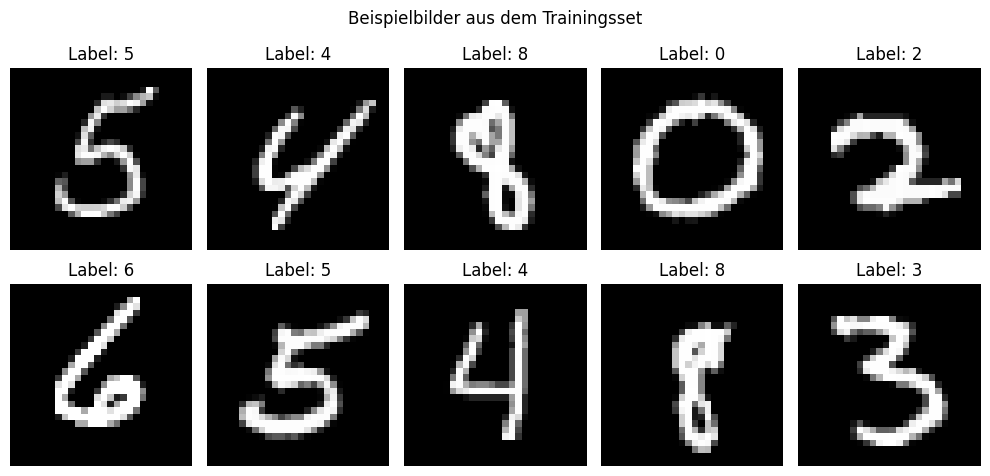

In [21]:
import matplotlib.pyplot as plt

# Einige Beispielbilder anzeigen
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.suptitle("Beispielbilder aus dem Trainingsset")
plt.tight_layout()
plt.show()

Nun können wir auch den Lernfortschritt visualisieren. Hierfür erstellen wir ein neues MLP und verwenden jetzt die Methode `partial_fit` anstelle der Methode `fit`, um nach den einzelnen Epochen den aktuellen Trainingsstatus zu erhalten.

In [22]:
import numpy as np

# Neues MLP erzeugen
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, random_state=42)
history_train = []
history_test = []

for i in range(1, clf.max_iter + 1):
    # Partielles fitting auf den Trainingsdaten. Hierbei wird das Modell schrittweise erweitert.
    # Die Angabe von classes gibt alle möglichen Labels an. Dies ist notwendig, damit das Modell auch dann korrekt ist, wenn die Trainingsdaten einer Epoche mal nicht alle Labels enthalten.
    clf.partial_fit(X_train, y_train, classes=np.unique(y))
    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    history_train.append(train_acc)
    history_test.append(test_acc)

Die Daten werden in dem jeweiligen History-Array abgespeichert. Diese können wir nun dafür nutzen, einen Plot der Lernkurve zu erstellen.

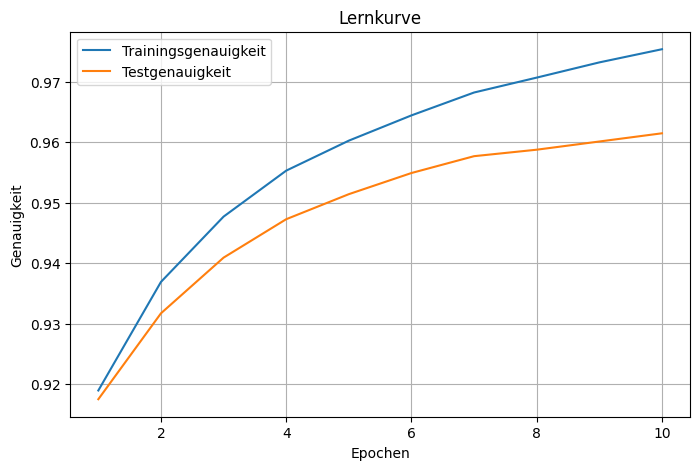

Letzte Trainingsgenauigkeit: 0.98
Letzte Testgenauigkeit: 0.96


In [24]:
# Lernkurve anzeigen
plt.figure(figsize=(8, 5))
plt.plot(range(1, clf.max_iter + 1), history_train, label='Trainingsgenauigkeit')
plt.plot(range(1, clf.max_iter + 1), history_test, label='Testgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Genauigkeit')
plt.title('Lernkurve')
plt.legend()
plt.grid(True)
plt.show()

# Letzte Trainings- und Testgenauigkeit ausgeben
print(f"Letzte Trainingsgenauigkeit: {history_train[-1]:.2f}")
print(f"Letzte Testgenauigkeit: {history_test[-1]:.2f}")

Wie in diesem Plot zu sehen ist, können bereits nach einer Epoche auf diesem relativ einfachen MLP bereits gute Ergebnisse erzielt werden. Zu sehen ist allerdings auch, dass die Trainings- und Testgenauigkeiten immer weiter auseinanderdriften und jede weitere Epoche die Genauigkeit nur noch schwächer verbessern kann.

# Übung 2

## Training und Klassifizierung mit einem CNN
In der zweiten Übung soll ein CNN (Convolutional Neural Network) trainiert werden, um verschiedene Objekte auf Farbbildern zu erkennen. Hierfür verwenden wir Tensorflow/Keras und den CIFAR10 Datensatz, welcher 60000 32x32 Pixel Farbbilder enthält, welche in 10 Kategorien eingeteilt sind.

Im ersten Schritt importieren wir wieder die nötigen Module.

In [27]:
# CIFAR10-Datensatz
from tensorflow.keras.datasets import cifar10
# Sequenzielles Modell aus Keras
from tensorflow.keras.models import Sequential
# Verschiedene Layer, aus welchen das Modell zusammengebaut wird
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
# Tools
from tensorflow.keras.utils import to_categorical

Im nächsten Schritt muss, wie auch schon in Übung 1, der Datensatz geladen, normalisiert und in Trainings- und Testdaten aufgeteilt werden.

Der CIFAR10-Datensatz hat diese Unterteilung bereits integriert, mit 5x10000 Bildern für das Training und einem weiteren Datensatz von 10000 Bildern für den Test.

Zudem müssen die Labels in die One-Hot-Kodierung überführt werden. Diese erlaubt es uns später, eine Wahrscheinlichkeitsverteilung über die 10 Klassen für das Testbild anzugeben.

In [28]:
# CIFAR-10 laden
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Normalisieren
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, 10) # One-Hot-Kodierung (0,0,0,1,0,0,0,0,0,0) = Kategorie 4

Im nächsten Schritt erstellen wir das Modell. Hierfür verwenden wir eine sequenzielle Zusammenstellung aus Layern (Beschreibung siehe Code-Kommentare). Diese Zusammenstellung wird dann kompiliert, also in ein nutzbares Modell zusammengebaut.

In [29]:
# CNN-Modell
model = Sequential([
    Input(shape=(32, 32, 3)), # Eingabe-Definition: 32x32 Pixel mit 3 Farbkanälen
    Conv2D(32, (3, 3), activation='relu'), # Convolutional Layer mit 32 3x3 Filtern zur Merkmalsextraktion (z.B. Kanten, Texturen, ...)
    MaxPooling2D(pool_size=(2, 2)), # Pooling-Layer, welcher die Bilder verkleinert und dabei die wichtigsten Merkmale extrahiert
    Conv2D(64, (3, 3), activation='relu'), # weiterer Convolutional-Layer, ermöglicht die Extraktion komplexerer Merkmale
    MaxPooling2D(pool_size=(2, 2)), # weiterer Pooling Layer, destilliert die Merkmale weiter
    Flatten(), # Umwandlung der 2D-Daten (entstanden durch Conv2D und MaxPooling2D) in eine Dimension
    Dense(64, activation='relu'), # Voll verbundener 64 Neuronen großer Layer, analog zum MLP in Übung 1
    Dense(10, activation='softmax') # Ausgabelayer mit 10 Neuronen, deren Output eine Wahrscheinlichkeitsverteilung über die 10 Kategorien darstellen
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Im nächsten Schritt wird das Modell über 5 Epochen trainiert und mit 10% der Daten validiert (Dauer ca. 3:30 min).

In [30]:
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.3708 - loss: 1.7268 - val_accuracy: 0.5514 - val_loss: 1.2475
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.5912 - loss: 1.1594 - val_accuracy: 0.6332 - val_loss: 1.0534
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 37s 26ms/step - accuracy: 0.6462 - loss: 1.0142 - val_accuracy: 0.6576 - val_loss: 0.9953
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.6868 - loss: 0.9133 - val_accuracy: 0.6750 - val_loss: 0.9753
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.7105 - loss: 0.8359 - val_accuracy: 0.6996 - val_loss: 0.8876


Nach dem Training können wir das Modell erneut testen

In [31]:
score = model.evaluate(X_test, to_categorical(y_test, 10))
print("Testgenauigkeit:", score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6770 - loss: 0.9428
Testgenauigkeit: 0.6725999712944031


Referenzwert für Fehlschlag der Live-Demo: Testgenauigkeit 0.67

Nach einer so kurzen Trainings-Zeit ergibt sich schon eine anschauliche Testgenauigkeit, welche jedoch durch Verbesserungen des Modells, längerem Training, etc. weiter verbessert werden kann.

Um nun noch einen Vergleich zu einem MLP herstellen zu können, wird im Folgenden ebendieses erstellt, auf denselben Daten trainiert und ebenfalls ausgewertet (Dauer ca. 50s).

In [32]:
# MLP-Modell (ohne Convolutional Layers)
mlp = Sequential([
    Input(shape=(32, 32, 3)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(X_train, y_train, epochs=5, validation_split=0.1)

score = mlp.evaluate(X_test, to_categorical(y_test, 10))
print("Testgenauigkeit:", score[1])

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2789 - loss: 2.0090 - val_accuracy: 0.3632 - val_loss: 1.7966
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3617 - loss: 1.7901 - val_accuracy: 0.3802 - val_loss: 1.7349
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3821 - loss: 1.7305 - val_accuracy: 0.3982 - val_loss: 1.6837
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.3922 - loss: 1.6915 - val_accuracy: 0.3998 - val_loss: 1.6688
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4091 - loss: 1.6545 - val_accuracy: 0.4210 - val_loss: 1.6364
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4110 - loss: 1.6106
Testgenauigkeit: 0.4106000065803528


Referenzwert für Fehlschlag der Live-Demo: Testgenauigkeit 0.41

Somit ist zu sehen, dass das einfache MLP im Gegensatz zum CNN eine deutlich niedrigere Genauigkeit erzielt und sogar die Mehrheit der Bilder falsch klassifiziert.